<a href="https://colab.research.google.com/github/Spandana2704/ML/blob/main/MLW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Salary_Data.csv")

In [ ]:
df.shape

(6704, 6)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1792, 6)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)  # or median
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna('Unknown', inplace=True)
df['Job Title'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1950562688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1950562688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le = LabelEncoder()
for col in ['Gender', 'Education Level', 'Job Title']:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])
print(df.head())

        Age  Gender  Education Level  Job Title  Years of Experience    Salary
0 -0.381131       1                0        177            -0.607418 -0.449948
1 -0.868631       0                3         18            -0.900064 -0.935281
2  1.203243       1                5        145             0.855808  0.714851
3  0.106369       0                0        116            -0.314773 -1.032348
4  2.056367       1                3         26             1.587421  1.685517


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Salary changes by 0.82 units for each additional year of experience.
Regression equation: Salary = -0.00 + 0.82 * YearsExperience


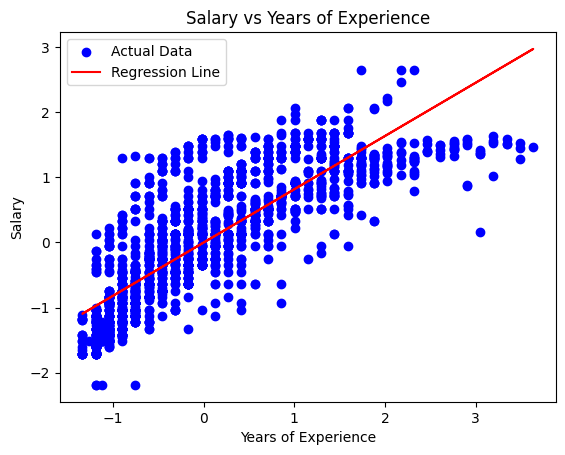

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['Years of Experience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Salary changes by {slope:.2f} units for each additional year of experience.")
print(f"Regression equation: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('/content/car_price_prediction.csv')
df = df.dropna(subset=['fiyat'])
numeric_cols = ['yil', 'kilometre', 'motor_hacmi', 'motor_gucu', 'fiyat']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

categorical_cols = ['marka', 'seri', 'model', 'vites_tipi', 'yakit_tipi', 'kasa_tipi', 'renk', 'kimden']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

y = df_encoded['fiyat']
X_selected = df[['kilometre', 'yil', 'motor_gucu']]
poly = PolynomialFeatures(degree=2)
X_numeric_poly = poly.fit_transform(X_selected)

df_cat_encoded = df_encoded.drop(['kilometre','yil','motor_gucu','fiyat'], axis=1)
df_cat_encoded = df_cat_encoded.apply(pd.to_numeric, errors='coerce')
cat_array = df_cat_encoded.values.astype(float)
X_final = np.concatenate((X_numeric_poly, cat_array), axis=1)

X_final = np.nan_to_num(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Final R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mse)
print("RMSE:", rmse)
print("Final number of features:", X_final.shape[1])


Final R² Score: 0.05710018125554228
MAE: 368774.0068969615
MSE: 47689201089636.18
RMSE: 6905736.824527574
Final number of features: 3977


In [ ]:
df=pd.read_csv('/content/diabetes_DT.csv')
df.shape

(768, 9)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [ ]:
df=df.drop_duplicates()

In [ ]:
X= df.drop(labels=['Outcome'],axis=1) #input variables
y=df['Outcome'] #output variable

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Confusion Matrix:
 [[78 21]
 [18 37]]


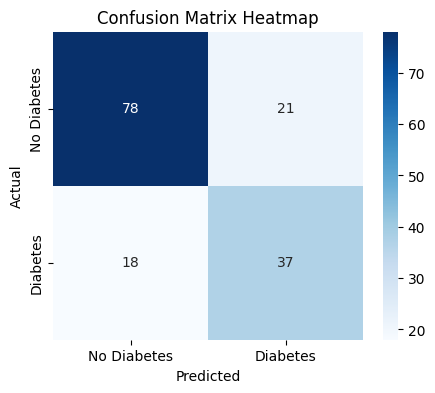

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



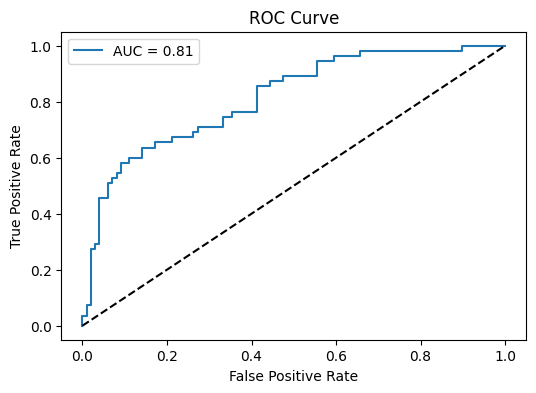

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

10-Fold CV Accuracy: 0.7735 ± 0.0357


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                     Feature  Coefficient
6  DiabetesPedigreeFunction     0.626718
5                       BMI     0.102607
0               Pregnancies     0.064373
7                       Age     0.037095
1                   Glucose     0.034095
3             SkinThickness     0.003291
4                   Insulin    -0.001803
2             BloodPressure    -0.013879


In [47]:
df=pd.read_csv('/content/house_price_train.csv')

In [48]:
df=df.drop_duplicates()

In [51]:
cols_to_drop = [
    'Id','Alley','MiscFeature','PoolQC','Fence','FireplaceQu',
    'Utilities','MiscVal','Condition2','GarageYrBlt',
    'TotalBsmtSF','GarageArea','MoSold'
]
df=df.drop(cols_to_drop,axis=1)

In [52]:
[col for col in df.columns if df[col].isnull().sum()>0]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [53]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
categorical_cols = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
                    'BsmtFinType1','BsmtFinType2','Electrical',
                    'GarageType','GarageFinish','GarageQual','GarageCond']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [56]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'YrSold', 'S

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [59]:
X = pd.get_dummies(X, drop_first=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R² Score: 0.7110249305442806
Mean Squared Error: 2216533048.4699244
Root Mean Squared Error: 47080.0706081663


In [64]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))


                       Coefficient
RoofMatl_WdShngl     613206.556475
RoofMatl_WdShake     604761.710136
RoofMatl_Metal       600156.591600
RoofMatl_Roll        589336.535649
RoofMatl_CompShg     588963.952714
...                            ...
Exterior1st_ImStucc  -81022.834085
GarageQual_Gd       -124989.687862
GarageQual_TA       -130904.142371
GarageQual_Fa       -137918.595872
GarageQual_Po       -140464.918056

[218 rows x 1 columns]
